In [1]:
#Import required modules
import xarray as xr
import dask
import matplotlib.pyplot as plt
import numpy as np
import scipy
import os
import glob as glob


In [2]:
#load in whole dataset

EC_Earth3_dir = '/g/data/e14/sm2435/CMIP6/EC-Earth3/'
#load in all full DS to get climatology
U=xr.open_mfdataset(os.path.join(EC_Earth3_dir, 'UO/*.nc' ))
V=xr.open_mfdataset(os.path.join(EC_Earth3_dir, 'VO/*.nc' ))
W=xr.open_mfdataset(os.path.join(EC_Earth3_dir, 'WO/*.nc' ))
T=xr.open_mfdataset(os.path.join(EC_Earth3_dir, 'THETAO/*.nc' ))
T=xr.open_mfdataset(os.path.join(EC_Earth3_dir, 'THETAO/*.nc' ))

#restrict data down to 9 gridcell block
U = U.sel(lat=slice(-23,-20),lon=slice(100,103))
V = V.sel(lat=slice(-23,-20),lon=slice(100,103))
W = W.sel(lat=slice(-23,-20),lon=slice(100,103))
T = T.sel(lat=slice(-23,-20),lon=slice(100,103))
#get W coords in same type as others
W = W.assign_coords(lev = T.lev)


/apps/jupyterlab/2.1.4-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  """
/apps/xarray/0.15.1-py3.7/lib/python3.7/site-packages/xarray-0.15.1-py3.7.egg/xarray/backends/api.py:941: FutureWarning: The datasets supplied do not have global dimension coordinates. In
future, to continue concatenating without supplying dimension
coordinates, please use the new `combine_nested` function (or the
`combine='nested'` option to open_mfdataset.
  from_openmfds=True,
/apps/jupyterlab/2.1.4-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future defaul

In [3]:
dTdt = T.thetao.chunk(1980, 20,3,3).differentiate(coord = 'time',datetime_unit= 's')
dTdx = T.thetao.differentiate('lon') / (110e3 * np.cos(T.lat * np.pi / 180))
dTdy = T.thetao.differentiate('lat') / 110e3 
dTdz = T.thetao.differentiate('lev')

In [4]:
u = U.uo
v = V.vo
w = W.wo

In [5]:
#now get terms
uadv = u*dTdx
vadv = v*dTdy
wadv = w*dTdz

In [6]:
#load in q and get qnet
Q = xr.open_dataset('/g/data/e14/sm2435/CMIP6/EC-Earth3/EC-Earth3_HFDS.nc')
#get qnet and subset
qpch = (Q.hfds/(3986*1026*61.11283875)).sel(lat=slice(-23,-20),lon=slice(100,103))[:,1,1]

In [7]:
#now load vars to memory and close DS
uadv.load()
vadv.load()
wadv.load()
qpch.load()
dTdt.load()

<xarray.DataArray 'thetao' (time: 1980, lev: 20, lat: 3, lon: 3)>
array([[[[ 5.94696473e-07,  6.29961619e-07,  6.66365736e-07],
         [ 6.46503509e-07,  6.60310945e-07,  6.74935620e-07],
         [ 6.37126902e-07,  6.42181874e-07,  6.46094122e-07]],

        [[ 5.94254914e-07,  6.29403360e-07,  6.66255687e-07],
         [ 6.46253511e-07,  6.60609544e-07,  6.75523779e-07],
         [ 6.38274059e-07,  6.42662314e-07,  6.46013348e-07]],

        [[ 5.93802952e-07,  6.28846578e-07,  6.66038716e-07],
         [ 6.46115097e-07,  6.60498017e-07,  6.75479669e-07],
         [ 6.38437200e-07,  6.42455745e-07,  6.45149726e-07]],

        ...,

        [[-5.08379365e-08, -2.71539751e-08, -2.43829028e-08],
         [-1.94326866e-08,  7.51250528e-09,  1.11770868e-08],
         [ 9.54796775e-09,  2.68351865e-08,  2.77099854e-08]],

        [[-1.55046909e-08, -3.54410035e-09, -2.01301309e-09],
         [-1.48775889e-08,  4.46230386e-09,  7.92558463e-09],
         [-3.51341889e-09,  1.34138514e-08,  1.74728036e-08]],

        [[-4.69428674e-09,  2.07437645e-09,  3.67281361e-09],
         [-1.25936799e-08,  1.62837044e-09,  6.85546953e-09],
         [-1.17181314e-08,  5.94998761e-09,  1.42669494e-08]]],


       [[[ 4.41922225e-07,  4.59334416e-07,  4.72796529e-07],
         [ 4.67004810e-07,  4.72736673e-07,  4.73643638e-07],
         [ 4.40877187e-07,  4.44893118e-07,  4.36152590e-07]],

        [[ 4.42293413e-07,  4.59841033e-07,  4.73577046e-07],
         [ 4.67604991e-07,  4.73732342e-07,  4.74847724e-07],
         [ 4.42099207e-07,  4.45868181e-07,  4.37234291e-07]],

        [[ 4.42539971e-07,  4.60277306e-07,  4.74152898e-07],
         [ 4.68134800e-07,  4.74334001e-07,  4.75505118e-07],
         [ 4.42827712e-07,  4.46396513e-07,  4.37810883e-07]],

        ...,

        [[ 3.05315702e-08,  3.14774624e-08,  2.26097292e-08],
         [ 9.82372850e-09,  2.54238319e-08,  2.94996223e-08],
         [ 2.64617679e-08,  3.75969478e-08,  3.95463537e-08]],

        [[ 1.91281142e-08,  2.27807231e-08,  2.11639524e-08],
         [ 3.95530897e-09,  1.57400422e-08,  2.01320027e-08],
         [ 1.14857741e-08,  2.37557991e-08,  2.85208035e-08]],

        [[ 1.43893022e-08,  1.72232362e-08,  1.72666379e-08],
         [ 1.92096827e-09,  1.11422898e-08,  1.58777347e-08],
         [ 3.57291130e-09,  1.62193476e-08,  2.30763142e-08]]],


       [[[ 1.93146590e-07,  1.78784660e-07,  1.58908662e-07],
         [ 1.69734747e-07,  1.58007538e-07,  1.34707776e-07],
         [ 1.17178750e-07,  1.14232265e-07,  8.83942093e-08]],

        [[ 1.93535215e-07,  1.79515894e-07,  1.59577667e-07],
         [ 1.69875889e-07,  1.58869426e-07,  1.35404093e-07],
         [ 1.17260058e-07,  1.14606074e-07,  8.93179575e-08]],

        [[ 1.93902864e-07,  1.80241031e-07,  1.59826101e-07],
         [ 1.70469605e-07,  1.58743148e-07,  1.35908422e-07],
         [ 1.17895354e-07,  1.15441068e-07,  9.02676973e-08]],

        ...,

        [[ 1.76061008e-07,  1.50206304e-07,  1.18904879e-07],
         [ 9.92937501e-08,  8.48872048e-08,  7.05779541e-08],
         [ 5.49345280e-08,  4.52058835e-08,  4.05414013e-08]],

        [[ 9.49612797e-08,  8.34792715e-08,  6.96531472e-08],
         [ 5.50427934e-08,  4.94897385e-08,  4.39692514e-08],
         [ 3.23241238e-08,  3.09894048e-08,  3.05798231e-08]],

        [[ 5.44678578e-08,  4.95617307e-08,  4.32603038e-08],
         [ 3.53750131e-08,  3.29034684e-08,  3.01618677e-08],
         [ 2.23733299e-08,  2.30610375e-08,  2.37411815e-08]]],


       ...,


       [[[ 1.12464953e-07,  8.39734255e-08,  6.95727707e-08],
         [ 8.74556108e-08,  6.62534418e-08,  5.95630247e-08],
         [ 6.32406341e-08,  5.08126874e-08,  5.00852728e-08]],

        [[ 1.11651048e-07,  8.31692901e-08,  6.88562096e-08],
         [ 8.68222898e-08,  6.56776606e-08,  5.89134181e-08],
         [ 6.26149159e-08,  5.02607946e-08,  4.98406294e-08]],

        [[ 1.10755707e-07,  8.25413977e-08,  6.84081840e-08],
         [ 8.62132126e-08,  6.52802967e-08,  5.872

In [8]:
#extract central point
dTdt = dTdt[:,:,1,1]
uadv = uadv[:,:,1,1]
vadv = vadv[:,:,1,1]
wadv = wadv[:,:,1,1]


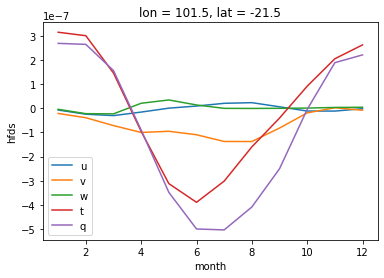

In [9]:
uadv.groupby('time.month').mean('time').mean('lev').plot(label = 'u')
vadv.groupby('time.month').mean('time').mean('lev').plot(label = 'v')
wadv.groupby('time.month').mean('time').mean('lev').plot(label = 'w')
dTdt.groupby('time.month').mean('time').mean('lev').plot(label = 't')
qpch.groupby('time.month').mean('time').plot(label = 'q')

plt.legend()

In [10]:
#now see plot with weighted average of depths
#generate weights from depth coordinates, basing on thickness of each layer
weights = dTdt.lev

In [11]:
weights

<xarray.DataArray 'lev' (lev: 20)>
array([ 0.50576 ,  1.555855,  2.667682,  3.85628 ,  5.140361,  6.543034,
        8.092519,  9.82275 , 11.77368 , 13.991038, 16.525322, 19.429802,
       22.757616, 26.5583  , 30.874561, 35.740204, 41.180023, 47.211895,
       53.850636, 61.112839])
Coordinates:
  * lev      (lev) float64 0.5058 1.556 2.668 3.856 ... 41.18 47.21 53.85 61.11
    lat      float64 -21.5
    lon      float64 101.5
Attributes:
    standard_name:  depth
    long_name:      ocean depth coordinate
    units:          m
    positive:       down
    axis:           Z
    bounds:         lev_bnds

In [12]:
WdTdt=dTdt.weighted(weights).mean('lev')

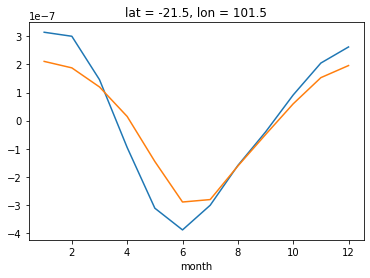

In [13]:
dTdt.groupby('time.month').mean('time').mean('lev').plot(label = 't')
WdTdt.groupby('time.month').mean('time').plot(label = 'WT')

In [14]:
#wtd avg by layer thickness
weights1 = np.insert(weights, 0,0)
W2 = weights1[1:].values-weights1[:-1].values
W3 = xr.DataArray(W2, coords={'lev': T.lev},
             dims=['lev'])

In [15]:
#now calc layer wtd avg
WdTdt2=dTdt.weighted(W3).mean('lev')

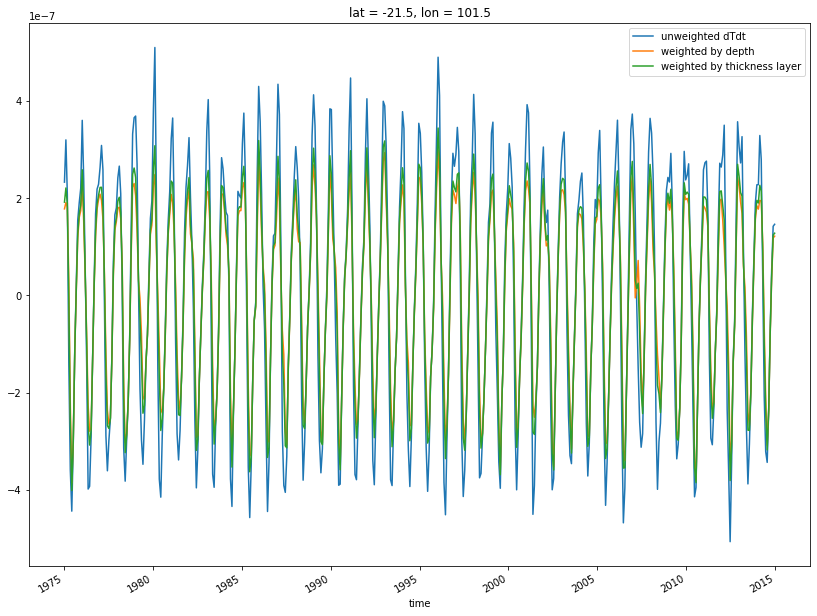

In [16]:
plt.figure(figsize = (14,10))
dTdt.mean('lev')[-480:].plot(label = 'unweighted dTdt')
WdTdt[-480:].plot(label = 'weighted by depth')
WdTdt2[-480:].plot(label = 'weighted by thickness layer')
plt.legend()

In [17]:
#create weights based on actual thickness of cell
wt=np.array([0.])
for i in range(len(weights.values)):
    print(i)
    NW = 2*weights.values[i]-wt[i]
    wt = np.insert(wt,i+1,NW)
    print (NW)

0
1.0115200281143188
1
2.10019052028656
2
3.2351728677749634
3
4.477386832237244
4
5.803335785865784
5
7.282731413841248
6
8.902306199073792
7
10.743193984031677
8
12.804165482521057
9
15.177911162376404
10
17.872732758522034
11
20.986871123313904
12
24.528360962867737
13
28.588239073753357
14
33.16088354587555
15
38.3195241689682
16
44.04052221775055
17
50.383267760276794
18
57.31800329685211
19
64.90767419338226


In [134]:
#calcualte thickness of each layer and use as a weight
thickness = wt[1:]-wt[:-1]
thickness_DA = xr.DataArray(thickness, coords={'lev': T.lev},
             dims=['lev'])
dTdt_thickness=dTdt.weighted(thickness_DA).mean('lev')
uadv_thickness=uadv.weighted(thickness_DA).mean('lev')
vadv_thickness=vadv.weighted(thickness_DA).mean('lev')
wadv_thickness=wadv.weighted(thickness_DA).mean('lev')

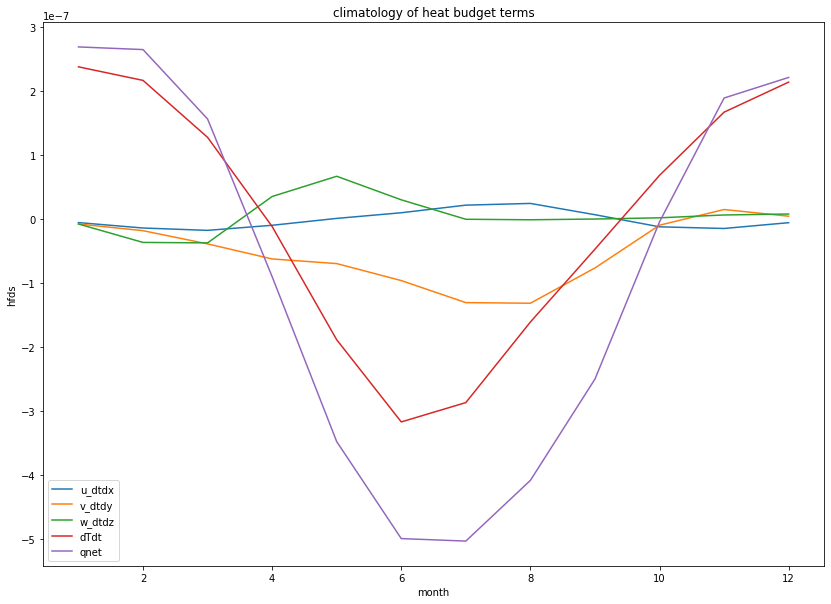

In [141]:
plt.figure(figsize = (14,10))
uadv_thickness.groupby('time.month').mean('time').plot(label = 'u_dtdx')
vadv_thickness.groupby('time.month').mean('time').plot(label = 'v_dtdy')
wadv_thickness.groupby('time.month').mean('time').plot(label = 'w_dtdz')
dTdt_thickness.groupby('time.month').mean('time').plot(label = 'dTdt')
qpch.groupby('time.month').mean('time').plot(label = 'qnet')
plt.title('climatology of heat budget terms')
plt.legend()

Text(0.5, 1.0, '2005-2015 heat budget terms')

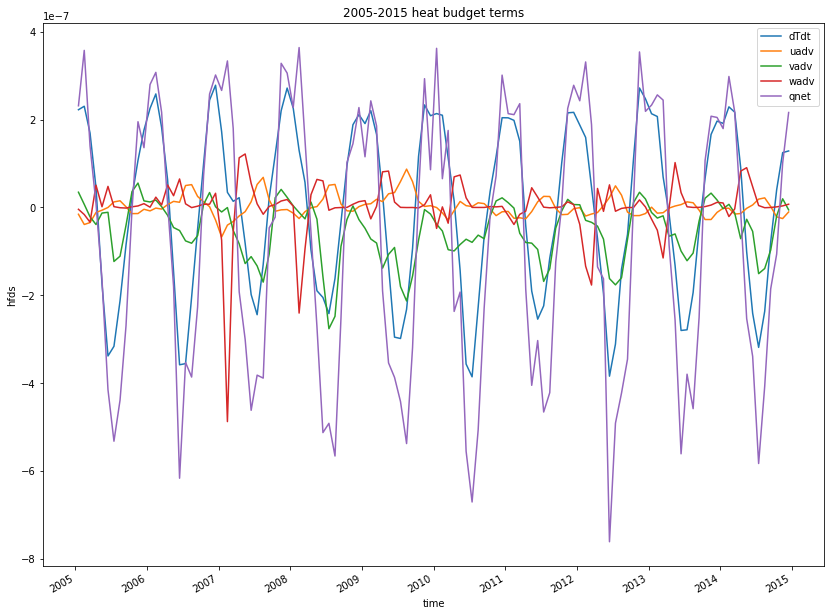

In [140]:
plt.figure(figsize = (14,10))
dTdt_thickness[-120:].plot(label = 'dTdt')
uadv_thickness[-120:].plot(label = 'uadv')
vadv_thickness[-120:].plot(label = 'vadv')
wadv_thickness[-120:].plot(label = 'wadv')
qpch[-120:].plot(label = 'qnet')
plt.legend()
plt.title('2005-2015 heat budget terms')

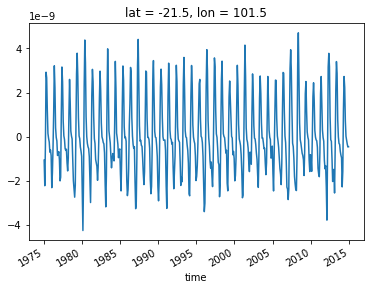

In [20]:
(WdTdt2-dTdt_thickness)[-480:].plot()

In [21]:
WdTdt2[:-480]

<xarray.DataArray (time: 1500)>
array([2.96852267e-07, 2.54126956e-07, 1.65553189e-07, ...,
       1.17645461e-07, 2.02898126e-07, 2.20470748e-07])
Coordinates:
    lat      float64 -21.5
    lon      float64 101.5
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 ... 1974-12-16T12:00:00

In [22]:
weights1[1]*2

<xarray.DataArray 'lev' ()>
array(1.01152003)
Coordinates:
    lev      float64 1.556
    lat      float64 -21.5
    lon      float64 101.5

In [23]:
(weights1[2]*2)

<xarray.DataArray 'lev' ()>
array(3.11171055)
Coordinates:
    lev      float64 2.668
    lat      float64 -21.5
    lon      float64 101.5

In [28]:
w

,Array,Chunk
Bytes,1.43 MB,8.64 kB
Shape,"(1980, 20, 3, 3)","(12, 20, 3, 3)"
Count,662 Tasks,165 Chunks
Type,float32,numpy.ndarray


In [30]:
#get weighted average of each layer
dTdt_TW=dTdt.weighted(thickness_DA).mean('lev')
uadv_TW=uadv.weighted(thickness_DA).mean('lev')
vadv_TW=vadv.weighted(thickness_DA).mean('lev')
wadv_TW=wadv.weighted(thickness_DA).mean('lev')

In [38]:
#calcuklate residual term
res = dTdt_TW + uadv_TW +vadv_TW + wadv_TW - qpch

Text(0, 0.5, 'Degrees C per s')

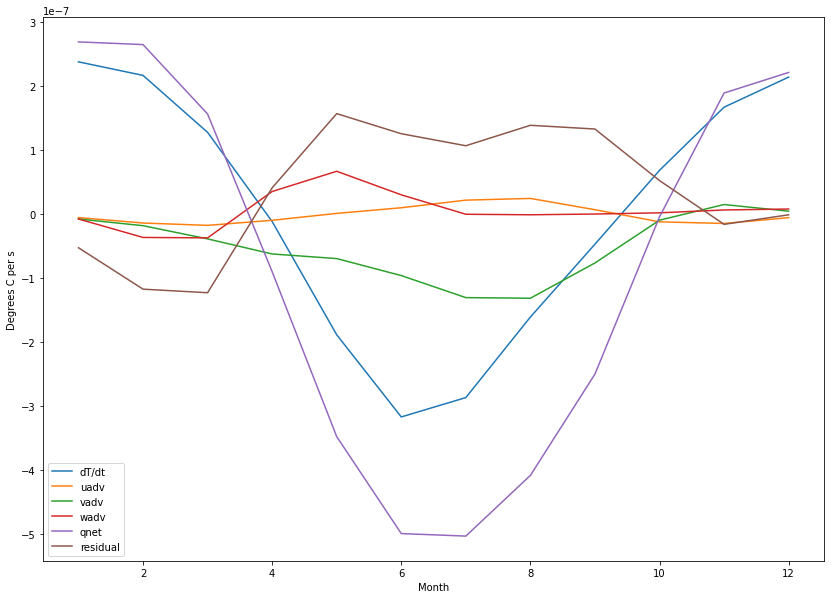

In [48]:
#now plot the layer thickness weighted average
plt.figure(figsize=(14,10))
plt.plot(list(range(1,13)), dTdt_TW.groupby('time.month').mean('time'), label = 'dT/dt')
plt.plot(list(range(1,13)), uadv_TW.groupby('time.month').mean('time'), label = 'uadv')
plt.plot(list(range(1,13)), vadv_TW.groupby('time.month').mean('time'), label = 'vadv')
plt.plot(list(range(1,13)), wadv_TW.groupby('time.month').mean('time'), label = 'wadv')
plt.plot(list(range(1,13)), qpch.groupby('time.month').mean('time'), label = 'qnet')
plt.plot(list(range(1,13)),res.groupby('time.month').mean('time'), label = 'residual')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Degrees C per s')
plt.title('')

In [40]:
res

<xarray.DataArray (time: 1980)>
array([-6.48949020e-08, -2.96074567e-07,  4.57555789e-08, ...,
        1.07349835e-07,  2.17358605e-08, -9.59715445e-08])
Coordinates:
    lat      float64 -21.5
    lon      float64 101.5
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00

In [ ]:
#perform the calcualtions manually wihotut hte funtions


In [45]:
list(range(1,13))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [66]:
T.thetao

,Array,Chunk
Bytes,31.68 kB,192 B
Shape,"(1980, 2)","(12, 2)"
Count,495 Tasks,165 Chunks
Type,datetime64[ns],numpy.ndarray
,Array,Chunk
Bytes,633.60 kB,3.84 kB
Shape,"(1980, 20, 2)","(12, 20, 2)"
Count,662 Tasks,165 Chunks
Type,float64,numpy.ndarray
,Array,Chunk


In [83]:
dTdt

<xarray.DataArray 'thetao' (time: 1980, lev: 20)>
array([[ 6.6031095e-07,  6.6060954e-07,  6.6049802e-07, ...,
         7.5125053e-09,  4.4623039e-09,  1.6283704e-09],
       [ 4.7273667e-07,  4.7373234e-07,  4.7433400e-07, ...,
         2.5423832e-08,  1.5740042e-08,  1.1142290e-08],
       [ 1.5800754e-07,  1.5886943e-07,  1.5874315e-07, ...,
         8.4887205e-08,  4.9489739e-08,  3.2903468e-08],
       ...,
       [ 6.6253442e-08,  6.5677661e-08,  6.5280297e-08, ...,
         1.9536355e-08, -1.2051213e-10, -1.6379877e-08],
       [ 1.5958122e-07,  1.5942524e-07,  1.5945382e-07, ...,
         9.9063499e-08,  6.9623077e-08,  4.2458630e-08],
       [ 1.6500390e-07,  1.6493730e-07,  1.6530500e-07, ...,
         1.0542169e-07,  8.0161911e-08,  5.4496812e-08]], dtype=float32)
Coordinates:
  * lev      (lev) float64 0.5058 1.556 2.668 3.856 ... 41.18 47.21 53.85 61.11
    lat      float64 -21.5
    lon      float64 101.5
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00

In [103]:
dTdx

,Array,Chunk
Bytes,2.85 MB,17.28 kB
Shape,"(1980, 20, 3, 3)","(12, 20, 3, 3)"
Count,1818 Tasks,165 Chunks
Type,float64,numpy.ndarray


In [101]:
data_list = []
try:
    for i in range(len(T.time)):
        dtval = ((T.thetao[i+2,:,:,:]-T.thetao[i,:,:,:])/(2*60*60*24*30)).values
        data_list.append(dtval)
except:
    print('error')
DTarr = np.asarray(data_list)
dTdt_test = xr.DataArray(DTarr, coords={'time': T.time[1:-1], 'lev': T.lev, 'lat': T.lat, 'lon':T.lon},
             dims=['time', 'lev', 'lat', 'lon'], attrs=dict(
        description="dT/dt, calculated with central differecning (t3-t1/2months)",
        units="degC per second"))

error


In [132]:
#now do the same for dt/dy
i = 0
dtval = ((T.thetao[:,:,i+2,:]-T.thetao[:,:,i,:])/(110e3)).values
dTdy_test =xr.DataArray(dtval, coords={'time': T.time, 'lev': T.lev, 'lat': T.lat, 'lon':T.lon},
             dims=['time', 'lev', 'lat', 'lon'], attrs=dict(
        description="dT/dy, calculated with central differecning (t3-t1/2months)",
        units="degC per second"))

ValueError: different number of dimensions on data and dims: 3 vs 4

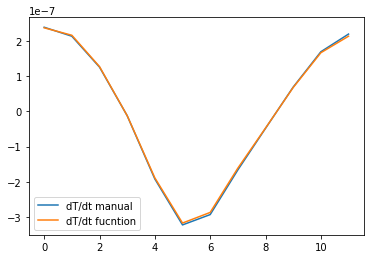

In [148]:
plt.plot(dTdt_test[:,:,1,1].weighted(thickness_DA).mean('lev').groupby('time.month').mean('time'), label = 'dT/dt manual')
plt.plot(dTdt_TW.groupby('time.month').mean('time'), label = 'dT/dt fucntion')
plt.legend()

In [ ]:
#now do the same for dt/dx
i = 0
dtval = ((T.thetao[:,:,:,i+2]-T.thetao[:,:,:,i])/(110e3)).values
dTdy_test =xr.DataArray(dtval, coords={'time': T.time, 'lev': T.lev, 'lat': T.lat, 'lon':T.lon},
             dims=['time', 'lev', 'lat', 'lon'], attrs=dict(
        description="dT/dy, calculated with central differecning (t3-t1/2months)",
        units="degC per second"))

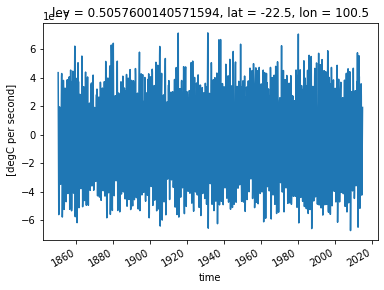

In [100]:
dTdt_test[:,0,0,0].plot()

In [49]:
data_list = []
try:
    for i in range(len(T)):
        dtval = ((T[i+2]-T[i])/(2*60*60*24*30)).values
        data_list.append(dtval)
except:
    print('error')

error


In [50]:
#now put the list into an array
DTarr = np.asarray(data_list)

In [51]:
DTarr

array([], dtype=float64)

In [27]:
dTdt_test = xr.DataArray(DTarr, coords={'time': T.time[1:-1]},
             dims=['time'], attrs=dict(

        description="dT/dt, calculated with central differecning (t3-t1/2months)",

        units="degC per second"))

ValueError: conflicting sizes for dimension 'time': length 0 on the data but length 1978 on coordinate 'time'

In [ ]:
dTdt_test

In [ ]:
dTdt_test.groupby('time.month').mean('time').plot()

In [ ]:
lat = ds['latitude'].values
long = ds['longitude'].values
elevation_band = ds['elevation_band'].values

mean_elev = np.array([0.1, 0.5, 0.3, 0.6]).reshape((4, 1, 1))

me = xr.DataArray(mean_elev, coords={'latitude': lat, 'longitude': long, 
                                'elevation_band': elevation_band},
             dims=['elevation_band', 'latitude', 'longitude'])
ds['mean_elev'] = me